# 1.0 Data Understanding and Preporcessing

### 1.1 Import Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import preprocessing, model_selection, neighbors
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt


import seaborn as sns
import os

sns.set(rc = {"figure.figsize":(10, 6)}) #graph size

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

### 1.2 Load Data from Dataset

In [2]:
df = pd.read_csv("card_transdata.csv")
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


### 1.3 Check missing values in each columns

In [3]:
df.shape

(1000000, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


### 1.4 Check duplication of record

In [5]:
df.duplicated().sum()

0

### 1.5 Check unique value

In [6]:
print(df['distance_from_home'].unique())
print(df['distance_from_last_transaction'].unique())
print(df['ratio_to_median_purchase_price'].unique())
print(df['repeat_retailer'].unique())
print(df['used_chip'].unique())
print(df['used_pin_number'].unique())
print(df['online_order'].unique())
print(df['fraud'].unique())

#determine continuous or categorical data
numerical_features = ['distance_from_home','distance_from_last_transaction','ratio_to_median_purchase_price']
categorical_features =  ['repeat_retailer','used_chip','used_pin_number','online_order','fraud']

[57.87785658 10.8299427   5.09107949 ...  2.91485699  4.25872939
 58.10812496]
[0.31114001 0.1755915  0.80515259 ... 1.47268669 0.24202337 0.31811012]
[1.94593998 1.29421881 0.42771456 ... 0.21807549 0.47582206 0.38691985]
[1. 0.]
[1. 0.]
[0. 1.]
[0. 1.]
[0. 1.]


### 1.5 Show statistical properties of dataset

In [7]:
#check the skewness
df.describe().style.background_gradient(cmap = "plasma")

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


### 1.6 Detect and Deal with Outliers

##### Boxplot before Removing Outliers

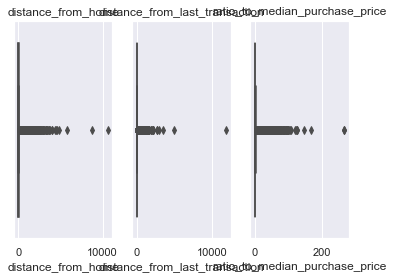

In [8]:
fig, axes = plt.subplots(1, 3, sharex=False)
position_matrix = [0,1,2]

count_var = 0

for feature in numerical_features:
    sns.boxplot(ax=axes[count_var],data=df, x=feature,hue='fraud')
    axes[position_matrix[count_var]].set_title(feature)
    count_var += 1
    
#Identify the outlying value
#distance_from_home = 5000
#distance_from_last_transaction = 5000
#ratio_to_median_purchase_price = 200

##### Investigate assumption made and Remove outliers if needed

# Assumption
------------------
##### For distance_from_home:
If the distance from home is outlier, is it a fraud operating from a far off distance ?

##### For distance_from_last_transaction:
If the distance from last transaction is outier, possibly can someone steal away the card and transact from a distant place? 

##### For ratio_to_median_purchase_price:
If the ratio_to_median purchase is too high, can it be a fraud withdrawing a huge amount of money ?

So lets check, we are going to delete these outliers only if the above assumptions are not true

In [9]:
df[df['distance_from_home']>5000]

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
266995,5797.972589,0.918924,2.359630,1.0,0.0,0.0,0.0,0.0
326661,10632.723672,1.151871,3.310613,1.0,0.0,0.0,1.0,1.0
847723,8777.136420,0.207396,3.441051,1.0,0.0,0.0,0.0,0.0


In [10]:
df[df['distance_from_last_transaction']>5000]

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
432691,1.943053,11851.104565,2.209891,1.0,1.0,0.0,1.0,0.0


In [11]:
df[df['ratio_to_median_purchase_price']>180]

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
88431,9.052056,0.054083,266.689692,1.0,0.0,0.0,1.0,1.0
470542,3.472339,0.645045,267.802942,1.0,0.0,0.0,0.0,0.0


In [12]:
#Remove outliers
df = df[df['distance_from_home']<=5000]
df = df[df['distance_from_last_transaction']<=5000]
df = df[df['ratio_to_median_purchase_price']<=180]
df.shape

(999994, 8)

### 1.7 Exploratory Data Analysis

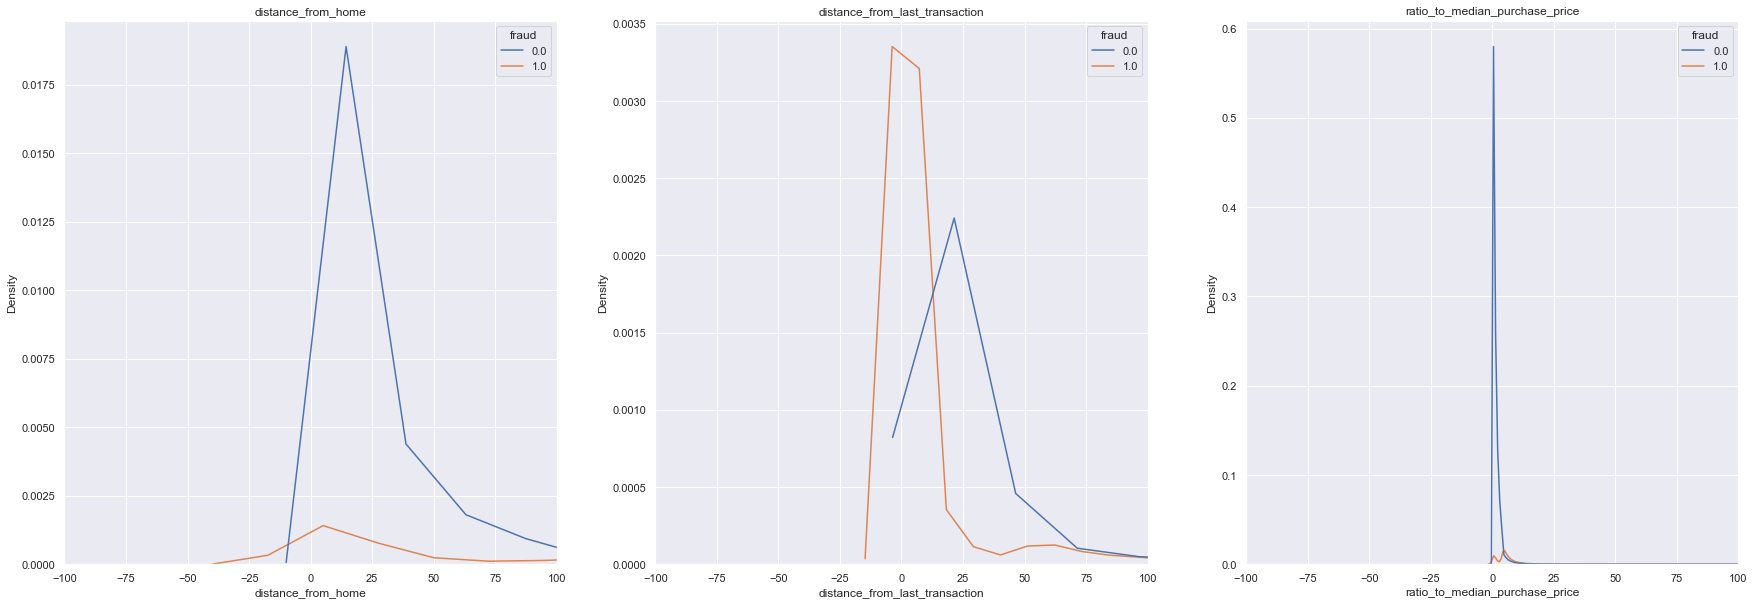

In [13]:
fig, axes = plt.subplots(1, 3, sharex=False, figsize=(30,10))
position_matrix = [0,1,2]

count_var = 0

for feature in numerical_features:
    sns.kdeplot(ax=axes[count_var],data=df, x=feature,hue='fraud')
    axes[position_matrix[count_var]].set_title(feature)
    axes[position_matrix[count_var]].set_xlim(-100, 100)
    count_var += 1

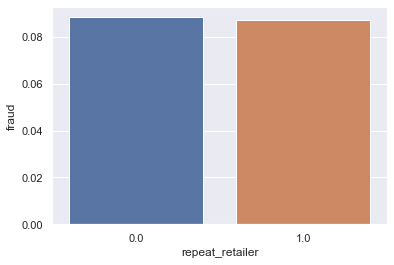

In [14]:
bar = df.groupby(by='repeat_retailer').mean()
sns.barplot(data=bar, x=bar.index, y='fraud');

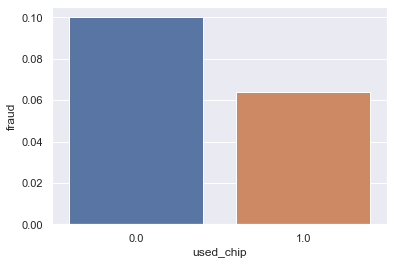

In [15]:
bar = df.groupby(by='used_chip').mean()
sns.barplot(data=bar, x=bar.index, y='fraud');

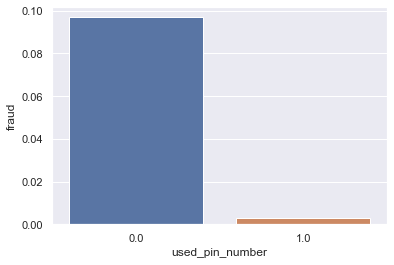

In [16]:
bar = df.groupby(by='used_pin_number').mean()
sns.barplot(data=bar, x=bar.index, y='fraud');

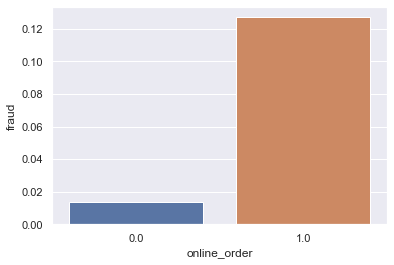

In [17]:
bar = df.groupby(by='online_order').mean()
sns.barplot(data=bar, x=bar.index, y='fraud');

### 1.8 Correlation Heatmap

<AxesSubplot:>

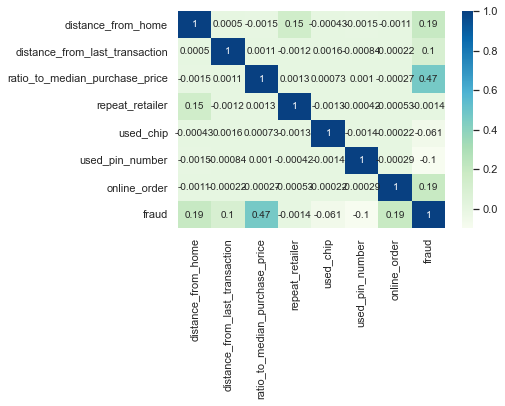

In [18]:
corr = df.corr()

sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, annot = True, cmap = "GnBu")

### 1.9 Detect and Deal with Imbalanced Class Distribution

##### Class Distribution before Applying Resampling

fraud
0.0    912593
1.0     87401
dtype: int64

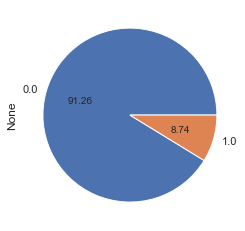

In [19]:
# Class distribution
# Real (class 0.0) meaning non-fraudulent transactions
# Fraud (class 1.0) meaning fraudulent transactions
df.value_counts("fraud").plot.pie(autopct = "%.2f")
df.value_counts("fraud")

##### Apply Resampling Technique (Undersampling)

In [20]:
real = df[df["fraud"] == 0]
fraud = df[df["fraud"] == 1]

# Resampling the original dataset with 87,401 datapoints for both classes
real_resample = real.sample(n = 87401, random_state = 123)
fraud_resample = fraud.sample(n = 87401, random_state = 123)

# Creating new dataset consisting of equal class occurence 
df0 = pd.concat([real_resample, fraud_resample], axis = 0)

##### Class Distribution After Applying Resampling

fraud
0.0    87401
1.0    87401
dtype: int64

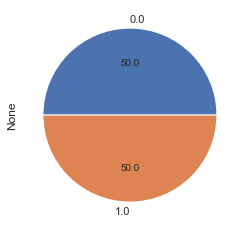

In [21]:
df0.value_counts("fraud").plot.pie(autopct = "%.1f")
df0.value_counts("fraud")

##### Variable Correlation After Applying Resampling

<AxesSubplot:>

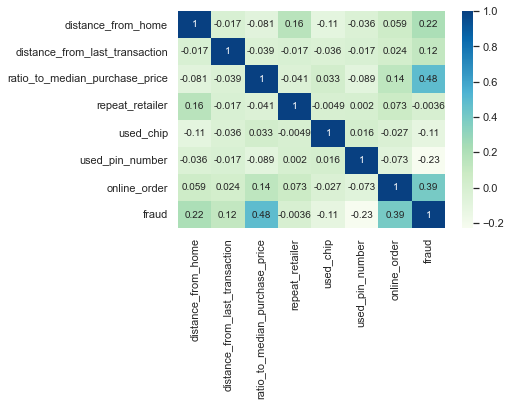

In [22]:
corr0 = df0.corr()

sns.heatmap(corr0, xticklabels = corr0.columns, yticklabels = corr0.columns, annot = True, cmap = "GnBu")

# 2.0 Data Preparation

### 2.1 Split Dataset into Feature and Class Variable

In [23]:
x = np.array(df0.drop(columns = "fraud"))
y = np.array(df0["fraud"])

### 2.2 Split into training set and testing set (80:20)

In [24]:
# Creating Train Test Split
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.2, random_state = 123, shuffle = True)

### 2.3 Feature Scaling

In [25]:
# Data scaling to produce good results
scale = MinMaxScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

print(x_train)

[[6.13598927e-02 6.67303568e-03 4.56500080e-03 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [4.67802567e-02 5.28609470e-03 4.02015104e-02 ... 1.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [3.55356788e-04 1.74584629e-04 3.52083578e-03 ... 0.00000000e+00
  1.00000000e+00 1.00000000e+00]
 ...
 [1.86944559e-02 2.41001007e-04 3.89312686e-03 ... 1.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [5.66268342e-04 2.35621003e-03 2.87532516e-03 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [5.14183147e-03 5.96742363e-06 1.78578872e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


# 3.0 Training the Models

### 3.1 Create and Fit the Models

### 3.1.1 K-Nearest Neighbors

In [26]:
# Preliminary definition of the classifier
knn = KNeighborsClassifier()
tuned_parameters = [{ 'n_neighbors':[1,2,3,4,5]}]

# CV setup cross validation
clf = GridSearchCV(estimator=knn,param_grid=tuned_parameters, cv=5, n_jobs=-1)

# Fit the training set
clf.fit(x_train, y_train)

print('Best parameters:')
print(clf.best_params_)
print(clf.best_score_)

Best parameters:
{'n_neighbors': 1}
0.9975329128899084


In [27]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_train,y_train)




KNeighborsClassifier()

### 3.1.2 Decision Tree

In [28]:
tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)



DecisionTreeClassifier()

### 3.1.3 Random Forest

In [29]:
# Preliminary definition of the classifier
forest = RandomForestClassifier(random_state = 0)

# The parameter name that needs to be selected is followed by the value
tuned_parameters = [{ 'n_estimators':range(25,75,1),"criterion":["gini","entropy"]}]
clf = GridSearchCV(estimator=forest,param_grid=tuned_parameters, cv=5, n_jobs=-1)
clf.fit(x, y)

print('Best parameters:')
print(clf.best_params_)
print(clf.best_score_)


Best parameters:
{'criterion': 'gini', 'n_estimators': 44}
0.9999713965355447


In [65]:
# forest = RandomForestClassifier(random_state = 5) # why need random_state
forest = RandomForestClassifier(n_estimators= clf.best_params_['n_estimators'],criterion = clf.best_params_['criterion'],random_state=0)

forest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=44, random_state=0)

### 3.2 Predictions of Models


In [52]:
knn_pred_train = knn.predict(x_train)
tree_pred_train = tree.predict(x_train)
forest_pred_train = forest.predict(x_train)

knn_pred_test = knn.predict(x_test)
tree_pred_test = tree.predict(x_test)
forest_pred_test = forest.predict(x_test)

# 4.0 Evaluation of Models

### 4.1 Testing Set Performance


In [53]:
# confusion matrix of KNN
confusion_matrix(y_test, knn_pred_test)

array([[17429,    89],
       [   17, 17426]], dtype=int64)

Text(84.5, 0.5, 'Actual')

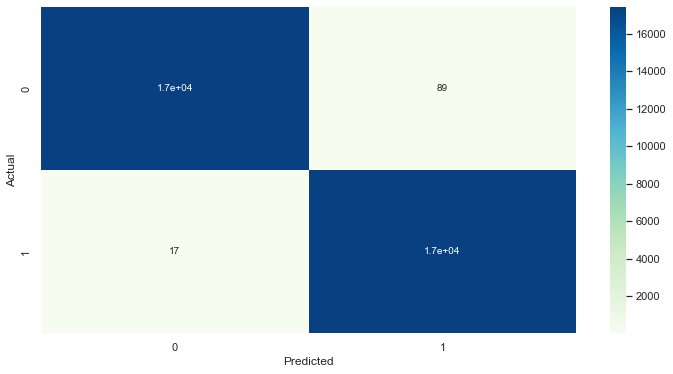

In [54]:
cm=confusion_matrix(y_test, knn_pred_test)
plt.figure(figsize = (12, 6))

sns.heatmap(cm, annot = True, cmap = "GnBu")
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [55]:
# confusion matrix of Decision Tree
confusion_matrix(y_test, tree_pred_test)

array([[17518,     0],
       [    1, 17442]], dtype=int64)

Text(84.5, 0.5, 'Actual')

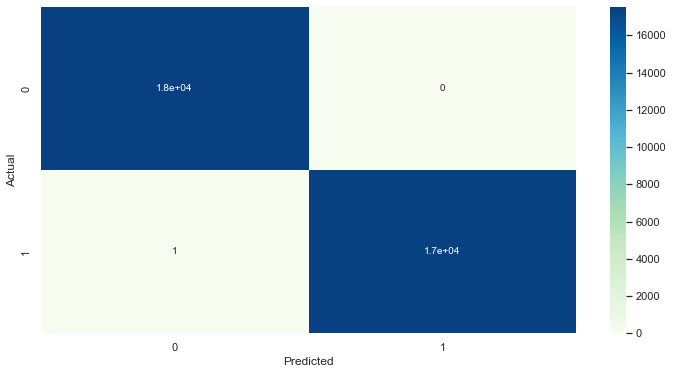

In [56]:
cm=confusion_matrix(y_test, tree_pred_test)
plt.figure(figsize = (12, 6))

sns.heatmap(cm, annot = True, cmap = "GnBu")
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [57]:
# confusion matrix of Random Forest
confusion_matrix(y_test, forest_pred_test)

array([[17518,     0],
       [    1, 17442]], dtype=int64)

Text(84.5, 0.5, 'Actual')

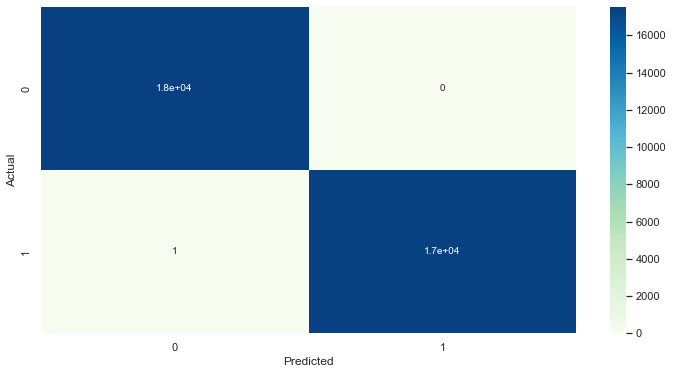

In [58]:
cm=confusion_matrix(y_test, forest_pred_test)
plt.figure(figsize = (12, 6))

sns.heatmap(cm, annot = True, cmap = "GnBu")
plt.xlabel("Predicted")
plt.ylabel("Actual")

### 4.2 Classification Report of Models

In [59]:
print("KNN Classifier : ")
# print(precision_score(y_test, knn_pred_test))
print(classification_report(y_test, knn_pred_test) )
print()

print("Decision Tree Classifier : ")
# print(precision_score(y_test, tree_pred_test))
print(classification_report(y_test, tree_pred_test) )
print()

print("Random Forest Tree Classifier : ")
# print(precision_score(y_test, forest_pred_test))
print(classification_report(y_test, forest_pred_test))
print()

KNN Classifier : 
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00     17518
         1.0       0.99      1.00      1.00     17443

    accuracy                           1.00     34961
   macro avg       1.00      1.00      1.00     34961
weighted avg       1.00      1.00      1.00     34961


Decision Tree Classifier : 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     17518
         1.0       1.00      1.00      1.00     17443

    accuracy                           1.00     34961
   macro avg       1.00      1.00      1.00     34961
weighted avg       1.00      1.00      1.00     34961


Random Forest Tree Classifier : 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     17518
         1.0       1.00      1.00      1.00     17443

    accuracy                           1.00     34961
   macro avg       1.00      1.00      1.00    

# 5.0 Compare and Select Best Model

# 6.0 Deployment